Original:


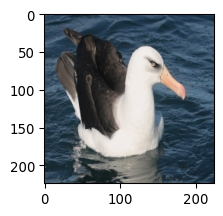

In [1]:
#TRY OUT DIFFERENT AUGMENTATIONS THAT YOU LIKE AND APPLY THEM TO THE END OF THE NOTEBOOK(Last two cells)
import imageio
import os
import imgaug as ia
%matplotlib inline

image = imageio.imread("D:\Birds150\\150\\train\\ALBATROSS\\001.jpg")

print("Original:")
ia.imshow(image)

Augmented:


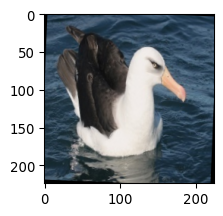

In [2]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented batch:


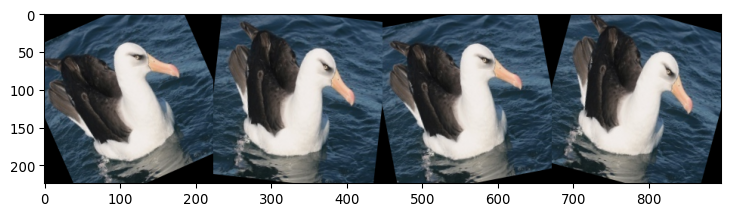

In [3]:
import numpy as np

images = [image, image, image, image]
images_aug = rotate(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

Augmented:


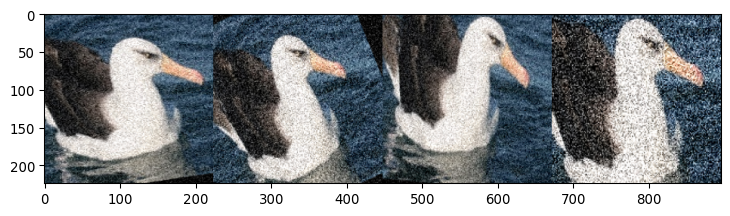

In [4]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq(images=images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

Augmented:


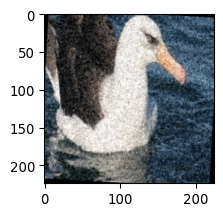

In [10]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 70)),
    iaa.Crop(percent=(0, 0.3))
  #  iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),
   # iaa.Cutout()
], random_order=True)

images_aug = [seq(image=image) for _ in range(1)]

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=1, rows=1))

Augmented:


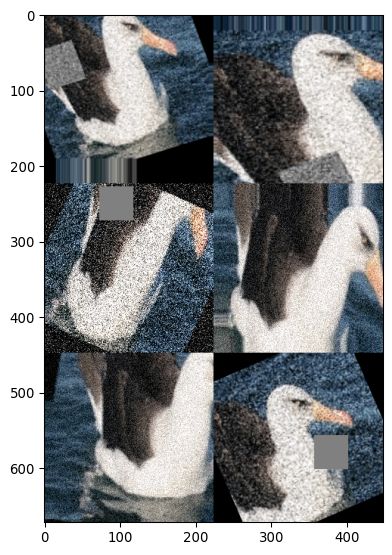

In [8]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 70)),
    iaa.Crop(percent=(0, 0.3)),
   iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),
   iaa.Cutout()
], random_order=True)

images_aug1 = [seq(image=image) for _ in range(6)] # 6 times

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug1, cols=2, rows=3))

In [88]:
#images_aug = iaa.Affine(rotate=(-45, 45)).augment_images([image] * 10)
  """
    count=0
    categories=["ALBATROSS","ALEXANDRINE PARAKEET"]
    datadir="D:\Birds150\\150\\train"
    for category in categories:
        path=os.path.join(datadir,category)
        image = imageio.imread(os.path.join(path,img))
        for i, image_aug1 in enumerate(images_aug1,start=100):
            imageio.imwrite(os.path.join(path,"%d.jpg") % (i,), image_aug1)
    count=i
   """
    

In [1]:
 #datadir="D:\Birds150\\150\\train\\ALBATROSS"
def no_of_imgs(directory):
    list1 = os.listdir(directory) # dir is your directory path
    number_files = len(list1)
    return number_files
#print(no_of_imgs(datadir))

In [ ]:
    count=0    
    categories=["ALBATROSS","ALEXANDRINE PARAKEET","AMERICAN AVOCET","AMERICAN BITTERN","AMERICAN COOT","BALD EAGLE","BARN OWL","BARN SWALLOW","BAR-TAILED GODWIT","BAY-BREASTED WARBLER"]#,"BROWN THRASHER","CACTUS WREN","CALIFORNIA CONDOR","CALIFORNIA GULL","CALIFORNIA QUAIL","DARK EYED JUNCO","DOWNY WOODPECKER","EASTERN BLUEBIRD","EASTERN ROSELLA","EASTERN TOWEE","FLAME TANAGER","FLAMINGO","FRIGATE","GLOSSY IBIS","GOLD WING WARBLER"
    #categories=['OSPREY', 'OSTRICH', 'PAINTED BUNTIG', 'PARADISE TANAGER', 'PARUS MAJOR', 'PEACOCK', 'PELICAN', 'PEREGRINE FALCON', 'PINK ROBIN', 'PUFFIN', 'PURPLE FINCH', 'PURPLE GALLINULE', 'PURPLE MARTIN', 'PURPLE SWAMPHEN', 'QUETZAL', 'RAINBOW LORIKEET', 'RED FACED CORMORANT', 'RED HEADED WOODPECKER', 'RED THROATED BEE EATER', 'RED WINGED BLACKBIRD', 'RED WISKERED BULBUL', 'RING-NECKED PHEASANT', 'ROADRUNNER', 'ROBIN', 'ROSY FACED LOVEBIRD', 'ROUGH LEG BUZZARD', 'RUBY THROATED HUMMINGBIRD', 'SAND MARTIN', 'SCARLET IBIS', 'SCARLET MACAW', 'SNOWY EGRET', 'SPLENDID WREN', 'SPOONBILL', 'STORK BILLED KINGFISHER', 'STRAWBERRY FINCH', 'TEAL DUCK', 'TIT MOUSE', 'TOUCHAN', 'TRUMPTER SWAN', 'TURKEY VULTURE', 'TURQUOISE MOTMOT', 'VARIED THRUSH', 'VENEZUELIAN TROUPIAL', 'VERMILION FLYCATHER', 'VIOLET GREEN SWALLOW', 'WESTERN MEADOWLARK', 'WILD TURKEY', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW HEADED BLACKBIRD']
    datadir="D:\Birds150\\150\\train"
    for category in categories:
        path=os.path.join(datadir,category)
        count=no_of_imgs(path)         
        for img in os.listdir(path):
            countimg=count+1
            image = imageio.imread(os.path.join(path,img))
            seq = iaa.Sequential([                                       #The type of augmentation
            iaa.Affine(rotate=(-25, 25)),
            iaa.AdditiveGaussianNoise(scale=(10, 70)),
            iaa.Crop(percent=(0, 0.3))
            ], random_order=True)
            images_aug = [seq(image=image) for _ in range(6)]            #6 copies of these types
            count=0
            for i, image_aug in enumerate(images_aug,start=countimg):
                imageio.imwrite(os.path.join(path,"%d.jpg") % (i,), image_aug) #Starts appending to the end of your file
                count=i
            seq = iaa.Sequential([                                       #Different Type of Augmentation
            iaa.Affine(rotate=(-25, 25)),
            iaa.AdditiveGaussianNoise(scale=(10, 70)),
            iaa.Crop(percent=(0, 0.3)),
            iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),
            iaa.Cutout()
            ], random_order=True)

            images_aug1 = [seq(image=image) for _ in range(6)]               #6 copies of these types
            for i, image_aug1 in enumerate(images_aug1,start=count+1):
                imageio.imwrite(os.path.join(path,"%d.jpg") % (i,), image_aug1)
                count=i
        
        


    